**Read the below intructions before proceeding :-**



---



1.   Run the cell containing all the required libraries to be imported.
2.   This code will let you visualize and predict the "Total Cases" in natural log and normal form. 

3.   You will notice the when you calculate using the nutural log of the cases , the value of var_a is negative , which ideally is a downward facing parabola.
4.  And when you calculate using the normal form of the cases , the value of var_a is positive , which ideally is an upward facing parabola.

5.   You will also observe that in our case , the parabola with negative coefficient var_a fits the data better compared to the other one.
6.   Refer 3rd block of the code to see ideal parabolas with positive and negative coefficients. Just change the sign of "a" to see both the cases.







In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


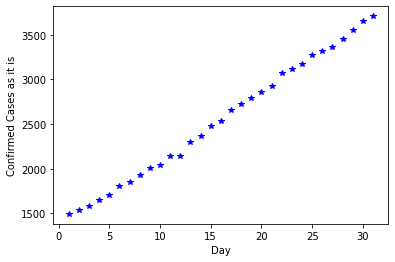

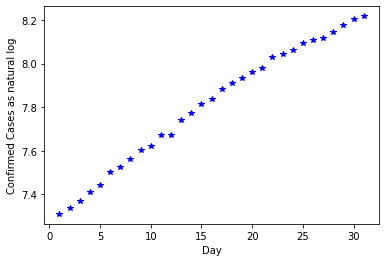

Variable a is :-  -0.00037
Variable b is :-  0.04268
Variable c is :-  7.24854
Log of cases on desired day are :-  8.407589663163211
Number of cases on desired day are :-  4480.946893192344



<function matplotlib.pyplot.show>

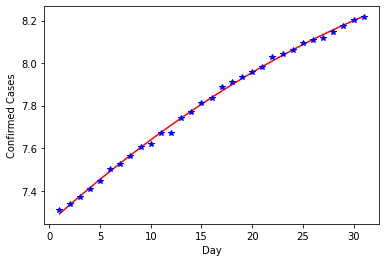

In [11]:
file='data.xlsx'
x1 = pd.ExcelFile(file)
df1 = x1.parse('Sheet1')


x = df1[["Day"]].to_numpy()
y = df1[["Total Confirmed Cases"]].to_numpy()

x_new = []
for i in x:
  for j in i:
    x_new.append(j)


y_new = []
for i in y:
  for j in i:
    y_new.append(j)

y_log = np.log(y_new)



plt.plot(x_new , y_new , 'b*')
plt.xlabel('Day')
plt.ylabel('Confirmed Cases as it is')
plt.show()

plt.plot(x_new , y_log , 'b*')
plt.xlabel('Day')
plt.ylabel('Confirmed Cases as natural log')
plt.show()

#Making the matrix A = [x^2 x 1]
c1 = [None] * len(x_new)
for i in range(len(x_new)):
  c1[i] = x_new[i]**2

c2 = [None] * len(x_new)
for i in range(len(x_new)):
  c2[i] = x_new[i]

c3 = [1] * len(x_new)

np.asarray(c1)
np.asarray(c2)
np.asarray(c3)
A = [None] * 3
A[0] = c1
A[1] = c2
A[2] = c3
A = np.transpose(A)
A_t = np.transpose(A)


np.asarray(y_new)
Y1 = [y_new] #cases as it is
Y1 = np.transpose(Y1)

np.asarray(y_log)
Y2 = [y_log] #cases in the form of natural log
Y2 = np.transpose(Y2)

var1 = A_t.dot(Y2)
#print(A1) #product of A transpose into Y

var2 = np.linalg.inv(A_t.dot(A))
#print(A2)#product of A into A transpose
#A3 = np.linalg.inv(A2)

var3 = var2.dot(var1)
var_a=(var3[0][0])
var_b=(var3[1][0])
var_c=(var3[2][0])

print("Variable a is :- ", round(var_a,5))
print("Variable b is :- ", round(var_b,5))
print("Variable c is :- ",round(var_c,5))


#Let's predict the cases for 12th June , which is 43rd Day from our reference dat i.e May 1st .
x_day = 43
y_day = var_a*(x_day**2) + var_b*x_day + var_c

print("Log of cases on desired day are :- " , y_day) #IN var1 , if its Y1 then use this.
print("Number of cases on desired day are :- " , math.exp(y_day)) #IN var1 , if its Y2 then use this as we have to take exponential of the answer we got. 
print(end='\n')
y_cases = []
for i in x_new:
  cases = var_a*(i**2) + var_b*i + var_c
  y_cases.append(cases)

np.asarray(y_cases)
#print(y_cases)


plt.plot(x_new,y_cases,'r')
plt.plot(x_new,y_log,'b*') #IN var1 , if its Y1 then use "y_new" and if its Y2 then use "y_log"
plt.xlabel('Day')
plt.ylabel('Confirmed Cases')
plt.show



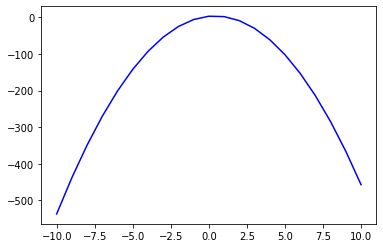

In [9]:
l = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
m = []
a=-5
b=4
c=3

for i in l:
  tmp = a*(i**2) + b*i + c
  m.append(tmp)

plt.plot(l,m,'b')
plt.show()